In [2]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter 

In [3]:
QRDQN_ep_len = pd.read_csv('./data/QRDQN/QRDQN_ep_len.csv')
QRDQN_ep_rew = pd.read_csv('./data/QRDQN/QRDQN_ep_rew.csv')
QRDQN_wins = pd.read_csv('./data/QRDQN/QRDQN_matches_won.csv')
QRDQN_losses = pd.read_csv('./data/QRDQN/QRDQN_matches_lost.csv')
QRDQN_wins = QRDQN_wins.set_index('Step')
QRDQN_losses = QRDQN_losses.set_index('Step')
QRDQN_ep_rew = QRDQN_ep_rew.set_index('Step')
QRDQN_ep_len = QRDQN_ep_len.set_index('Step')

In [5]:
DQN_ep_len = pd.read_csv('./data/DQN/Ryu/DQN_Ryu_ep_len.csv')
DQN_ep_rew = pd.read_csv('./data/DQN/Ryu/DQN_Ryu_ep_rew.csv')
DQN_wins = pd.read_csv('./data/DQN/Ryu/DQN_Ryu_matches_won.csv')
DQN_losses = pd.read_csv('./data/DQN/Ryu/DQN_Ryu_matches_lost.csv')
DQN_wins = DQN_wins.set_index('Step')
DQN_losses = DQN_losses.set_index('Step')
DQN_ep_rew = DQN_ep_rew.set_index('Step')
DQN_ep_len = DQN_ep_len.set_index('Step')

In [6]:
PPO_ep_len = pd.read_csv('./data/PPO/ryu_ep_len.csv')
PPO_ep_rew = pd.read_csv('./data/PPO/ryu_ep_rew.csv')
PPO_ep_rew = PPO_ep_rew.set_index('Step')
PPO_ep_len = PPO_ep_len.set_index('Step')

In [7]:
QRDQN_wins = QRDQN_wins.rename({'Value':'Wins'},axis=1)
QRDQN_losses = QRDQN_losses.rename({'Value':'Losses'},axis=1)
QRDQN_wins = QRDQN_wins.drop(['Wall time'], axis=1)
QRDQN_losses = QRDQN_losses.drop(['Wall time'], axis=1)

QRDQN_win_perc = QRDQN_wins.join(QRDQN_losses)
QRDQN_win_perc['Percent'] = QRDQN_win_perc['Wins'] / (QRDQN_win_perc['Wins'] + QRDQN_win_perc['Losses'])
# display(QRDQN_win_perc)

In [8]:
DQN_wins = DQN_wins.rename({'Value':'Wins'},axis=1)
DQN_losses = DQN_losses.rename({'Value':'Losses'},axis=1)
DQN_wins = DQN_wins.drop(['Wall time'], axis=1)
DQN_losses = DQN_losses.drop(['Wall time'], axis=1)

DQN_win_perc = DQN_wins.join(DQN_losses)
DQN_win_perc['Percent'] = DQN_win_perc['Wins'] / (DQN_win_perc['Wins'] + DQN_win_perc['Losses'])

Win Percentage

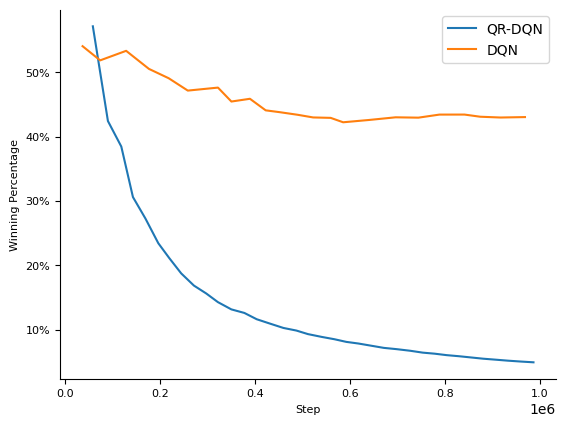

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(QRDQN_win_perc.index, QRDQN_win_perc['Percent'],label='QR-DQN')
ax1.plot(DQN_win_perc.index, DQN_win_perc['Percent'],label='DQN')
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Winning Percentage',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.rcParams["font.family"]="Times New Roman"
plt.show()

Mean Reward

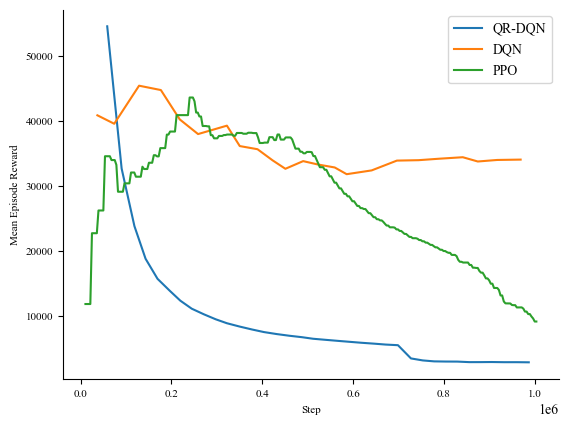

In [10]:
fig, ax1 = plt.subplots()
ax1.plot(QRDQN_ep_rew.index, QRDQN_ep_rew['Value'],label='QR-DQN')
ax1.plot(DQN_ep_rew.index, DQN_ep_rew['Value'],label='DQN')
ax1.plot(PPO_ep_rew.index, PPO_ep_rew['Value'],label='PPO')
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8)
plt.xticks(fontsize=8)
plt.legend()
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

Episode Length

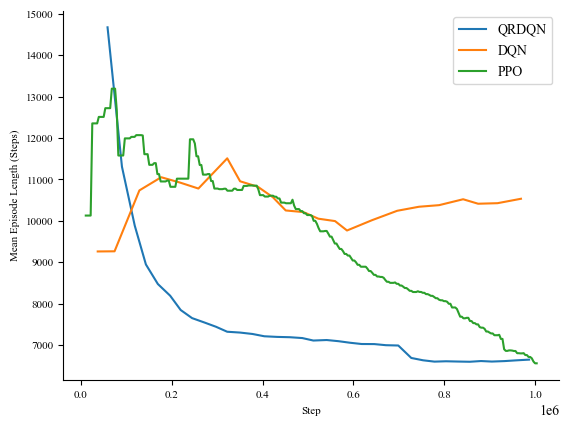

In [13]:
fig, ax1 = plt.subplots()
ax1.plot(QRDQN_ep_len.index, QRDQN_ep_len['Value'],label='QRDQN')
ax1.plot(DQN_ep_len.index, DQN_ep_len['Value'],label='DQN')
ax1.plot(PPO_ep_len.index, PPO_ep_len['Value'],label='PPO')
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Length (Steps)',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.legend(loc='upper right')
plt.show()

Episode Length and Reward

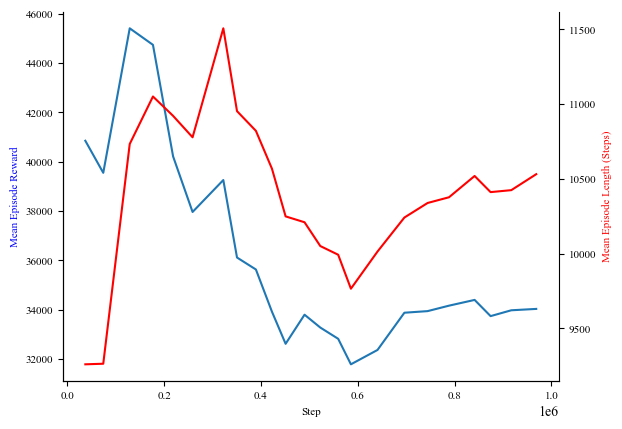

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(DQN_ep_rew.index, DQN_ep_rew['Value'])
# ax1.plot(PPO_ep_len.index, PPO_ep_len['Value'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8,color='b')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
ax2 = ax1.twinx()
ax2.spines[['top']].set_visible(False)
ax2.plot(DQN_ep_len.index, DQN_ep_len['Value'],color='red')
ax2.set_ylabel('Mean Episode Length (Steps)',fontsize=8,color='red')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

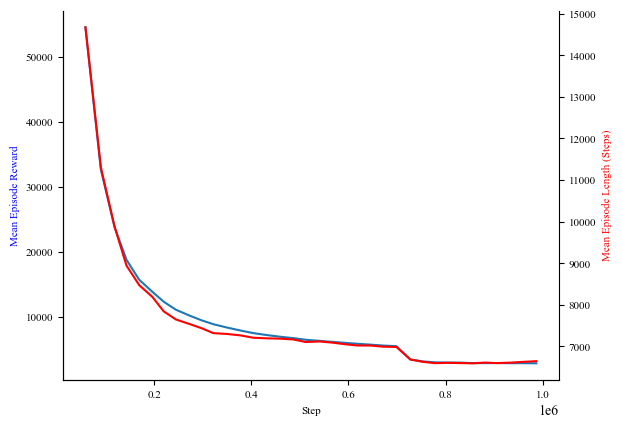

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(QRDQN_ep_rew.index, QRDQN_ep_rew['Value'])
# ax1.plot(PPO_ep_len.index, PPO_ep_len['Value'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8,color='b')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
ax2 = ax1.twinx()
ax2.spines[['top']].set_visible(False)
ax2.plot(QRDQN_ep_len.index, QRDQN_ep_len['Value'],color='red')
ax2.set_ylabel('Mean Episode Length (Steps)',fontsize=8,color='red')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

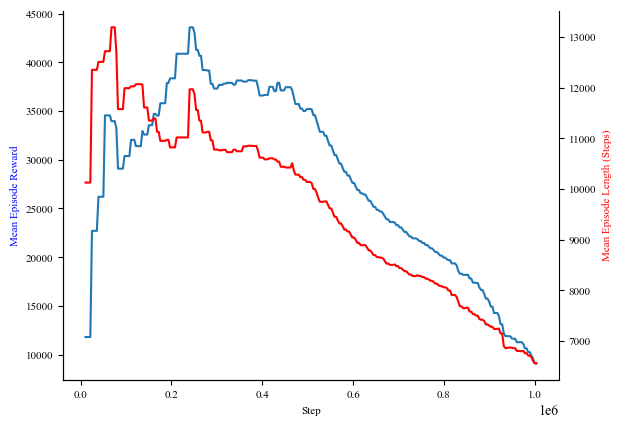

In [18]:
fig, ax1 = plt.subplots()
ax1.plot(PPO_ep_rew.index, PPO_ep_rew['Value'])
# ax1.plot(PPO_ep_len.index, PPO_ep_len['Value'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8,color='b')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
ax2 = ax1.twinx()
ax2.spines[['top']].set_visible(False)
ax2.plot(PPO_ep_len.index, PPO_ep_len['Value'],color='red')
ax2.set_ylabel('Mean Episode Length (Steps)',fontsize=8,color='red')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

Characters

In [19]:
Ryu_ep_len = pd.read_csv('./data/DQN/Ryu/DQN_Ryu_ep_len.csv')
Ryu_ep_rew = pd.read_csv('./data/DQN/Ryu/DQN_Ryu_ep_rew.csv')
Ryu_wins = pd.read_csv('./data/DQN/Ryu/DQN_Ryu_matches_won.csv')
Ryu_losses = pd.read_csv('./data/DQN/Ryu/DQN_Ryu_matches_lost.csv')
Ryu_wins = Ryu_wins.set_index('Step')
Ryu_losses = Ryu_losses.set_index('Step')
Ryu_ep_rew = Ryu_ep_rew.set_index('Step')
Ryu_ep_len = Ryu_ep_len.set_index('Step')
Ryu_wins = Ryu_wins.rename({'Value':'Wins'},axis=1)
Ryu_losses = Ryu_losses.rename({'Value':'Losses'},axis=1)
Ryu_wins = Ryu_wins.drop(['Wall time'], axis=1)
Ryu_losses = Ryu_losses.drop(['Wall time'], axis=1)

Ryu_win_perc = Ryu_wins.join(Ryu_losses)
Ryu_win_perc['Percent'] = Ryu_win_perc['Wins'] / (Ryu_win_perc['Wins'] + Ryu_win_perc['Losses'])

In [20]:
Balrog_ep_len = pd.read_csv('./data/DQN/Balrog/DQN_Balrog_ep_len.csv')
Balrog_ep_rew = pd.read_csv('./data/DQN/Balrog/DQN_Balrog_ep_rew.csv')
Balrog_wins = pd.read_csv('./data/DQN/Balrog/DQN_Balrog_matches_won.csv')
Balrog_losses = pd.read_csv('./data/DQN/Balrog/DQN_Balrog_matches_lost.csv')
Balrog_wins = Balrog_wins.set_index('Step')
Balrog_losses = Balrog_losses.set_index('Step')
Balrog_ep_rew = Balrog_ep_rew.set_index('Step')
Balrog_ep_len = Balrog_ep_len.set_index('Step')
Balrog_wins = Balrog_wins.rename({'Value':'Wins'},axis=1)
Balrog_losses = Balrog_losses.rename({'Value':'Losses'},axis=1)
Balrog_wins = Balrog_wins.drop(['Wall time'], axis=1)
Balrog_losses = Balrog_losses.drop(['Wall time'], axis=1)

Balrog_win_perc = Balrog_wins.join(Balrog_losses)
Balrog_win_perc['Percent'] = Balrog_win_perc['Wins'] / (Balrog_win_perc['Wins'] + Balrog_win_perc['Losses'])

In [21]:
Blanka_ep_len = pd.read_csv('./data/DQN/Blanka/DQN_Blanka_ep_len.csv')
Blanka_ep_rew = pd.read_csv('./data/DQN/Blanka/DQN_Blanka_ep_rew.csv')
Blanka_wins = pd.read_csv('./data/DQN/Blanka/DQN_Blanka_matches_won.csv')
Blanka_losses = pd.read_csv('./data/DQN/Blanka/DQN_Blanka_matches_lost.csv')
Blanka_wins = Blanka_wins.set_index('Step')
Blanka_losses = Blanka_losses.set_index('Step')
Blanka_ep_rew = Blanka_ep_rew.set_index('Step')
Blanka_ep_len = Blanka_ep_len.set_index('Step')
Blanka_wins = Blanka_wins.rename({'Value':'Wins'},axis=1)
Blanka_losses = Blanka_losses.rename({'Value':'Losses'},axis=1)
Blanka_wins = Blanka_wins.drop(['Wall time'], axis=1)
Blanka_losses = Blanka_losses.drop(['Wall time'], axis=1)

Blanka_win_perc = Blanka_wins.join(Blanka_losses)
Blanka_win_perc['Percent'] = Blanka_win_perc['Wins'] / (Blanka_win_perc['Wins'] + Blanka_win_perc['Losses'])

In [22]:
ChunLi_ep_len = pd.read_csv('./data/DQN/Chun-Li/DQN_Chun-Li_ep_len.csv')
ChunLi_ep_rew = pd.read_csv('./data/DQN/Chun-Li/DQN_Chun-Li_ep_rew.csv')
ChunLi_wins = pd.read_csv('./data/DQN/Chun-Li/DQN_Chun-Li_matches_won.csv')
ChunLi_losses = pd.read_csv('./data/DQN/Chun-Li/DQN_Chun-Li_matches_lost.csv')
ChunLi_wins = ChunLi_wins.set_index('Step')
ChunLi_losses = ChunLi_losses.set_index('Step')
ChunLi_ep_rew = ChunLi_ep_rew.set_index('Step')
ChunLi_ep_len = ChunLi_ep_len.set_index('Step')
ChunLi_wins = ChunLi_wins.rename({'Value':'Wins'},axis=1)
ChunLi_losses = ChunLi_losses.rename({'Value':'Losses'},axis=1)
ChunLi_wins = ChunLi_wins.drop(['Wall time'], axis=1)
ChunLi_losses = ChunLi_losses.drop(['Wall time'], axis=1)

ChunLi_win_perc = ChunLi_wins.join(ChunLi_losses)
ChunLi_win_perc['Percent'] = ChunLi_win_perc['Wins'] / (ChunLi_win_perc['Wins'] + ChunLi_win_perc['Losses'])

In [23]:
Dhalsim_ep_len = pd.read_csv('./data/DQN/Dhalsim/DQN_Dhalsim_ep_len.csv')
Dhalsim_ep_rew = pd.read_csv('./data/DQN/Dhalsim/DQN_Dhalsim_ep_rew.csv')
Dhalsim_wins = pd.read_csv('./data/DQN/Dhalsim/DQN_Dhalsim_matches_won.csv')
Dhalsim_losses = pd.read_csv('./data/DQN/Dhalsim/DQN_Dhalsim_matches_lost.csv')
Dhalsim_wins = Dhalsim_wins.set_index('Step')
Dhalsim_losses = Dhalsim_losses.set_index('Step')
Dhalsim_ep_rew = Dhalsim_ep_rew.set_index('Step')
Dhalsim_ep_len = Dhalsim_ep_len.set_index('Step')
Dhalsim_wins = Dhalsim_wins.rename({'Value':'Wins'},axis=1)
Dhalsim_losses = Dhalsim_losses.rename({'Value':'Losses'},axis=1)
Dhalsim_wins = Dhalsim_wins.drop(['Wall time'], axis=1)
Dhalsim_losses = Dhalsim_losses.drop(['Wall time'], axis=1)

Dhalsim_win_perc = Dhalsim_wins.join(Dhalsim_losses)
Dhalsim_win_perc['Percent'] = Dhalsim_win_perc['Wins'] / (Dhalsim_win_perc['Wins'] + Dhalsim_win_perc['Losses'])

In [24]:
EHonda_ep_len = pd.read_csv('./data/DQN/EHonda/DQN_Honda_ep_len.csv')
EHonda_ep_rew = pd.read_csv('./data/DQN/EHonda/DQN_Honda_ep_rew.csv')
EHonda_wins = pd.read_csv('./data/DQN/EHonda/DQN_Honda_matches_won.csv')
EHonda_losses = pd.read_csv('./data/DQN/EHonda/DQN_Honda_matches_lost.csv')
EHonda_wins = EHonda_wins.set_index('Step')
EHonda_losses = EHonda_losses.set_index('Step')
EHonda_ep_rew = EHonda_ep_rew.set_index('Step')
EHonda_ep_len = EHonda_ep_len.set_index('Step')
EHonda_wins = EHonda_wins.rename({'Value':'Wins'},axis=1)
EHonda_losses = EHonda_losses.rename({'Value':'Losses'},axis=1)
EHonda_wins = EHonda_wins.drop(['Wall time'], axis=1)
EHonda_losses = EHonda_losses.drop(['Wall time'], axis=1)

EHonda_win_perc = EHonda_wins.join(EHonda_losses)
EHonda_win_perc['Percent'] = EHonda_win_perc['Wins'] / (EHonda_win_perc['Wins'] + EHonda_win_perc['Losses'])

In [25]:
Guile_ep_len = pd.read_csv('./data/DQN/Guile/DQN_Guile_ep_len.csv')
Guile_ep_rew = pd.read_csv('./data/DQN/Guile/DQN_Guile_ep_rew.csv')
Guile_wins = pd.read_csv('./data/DQN/Guile/DQN_Guile_matches_won.csv')
Guile_losses = pd.read_csv('./data/DQN/Guile/DQN_Guile_matches_lost.csv')
Guile_wins = Guile_wins.set_index('Step')
Guile_losses = Guile_losses.set_index('Step')
Guile_ep_rew = Guile_ep_rew.set_index('Step')
Guile_ep_len = Guile_ep_len.set_index('Step')
Guile_wins = Guile_wins.rename({'Value':'Wins'},axis=1)
Guile_losses = Guile_losses.rename({'Value':'Losses'},axis=1)
Guile_wins = Guile_wins.drop(['Wall time'], axis=1)
Guile_losses = Guile_losses.drop(['Wall time'], axis=1)

Guile_win_perc = Guile_wins.join(Guile_losses)
Guile_win_perc['Percent'] = Guile_win_perc['Wins'] / (Guile_win_perc['Wins'] + Guile_win_perc['Losses'])

In [26]:
Ken_ep_len = pd.read_csv('./data/DQN/Ken/DQN_Ken_ep_len.csv')
Ken_ep_rew = pd.read_csv('./data/DQN/Ken/DQN_Ken_ep_rew.csv')
Ken_wins = pd.read_csv('./data/DQN/Ken/DQN_Ken_matches_won.csv')
Ken_losses = pd.read_csv('./data/DQN/Ken/DQN_Ken_matches_lost.csv')
Ken_wins = Ken_wins.set_index('Step')
Ken_losses = Ken_losses.set_index('Step')
Ken_ep_rew = Ken_ep_rew.set_index('Step')
Ken_ep_len = Ken_ep_len.set_index('Step')
Ken_wins = Ken_wins.rename({'Value':'Wins'},axis=1)
Ken_losses = Ken_losses.rename({'Value':'Losses'},axis=1)
Ken_wins = Ken_wins.drop(['Wall time'], axis=1)
Ken_losses = Ken_losses.drop(['Wall time'], axis=1)

Ken_win_perc = Ken_wins.join(Ken_losses)
Ken_win_perc['Percent'] = Ken_win_perc['Wins'] / (Ken_win_perc['Wins'] + Ken_win_perc['Losses'])

In [27]:
MBison_ep_len = pd.read_csv('./data/DQN/MBison/DQN_Bison_ep_len.csv')
MBison_ep_rew = pd.read_csv('./data/DQN/MBison/DQN_Bison_ep_rew.csv')
MBison_wins = pd.read_csv('./data/DQN/MBison/DQN_Bison_matches_won.csv')
MBison_losses = pd.read_csv('./data/DQN/MBison/DQN_Bison_matches_lost.csv')
MBison_wins = MBison_wins.set_index('Step')
MBison_losses = MBison_losses.set_index('Step')
MBison_ep_rew = MBison_ep_rew.set_index('Step')
MBison_ep_len = MBison_ep_len.set_index('Step')
MBison_wins = MBison_wins.rename({'Value':'Wins'},axis=1)
MBison_losses = MBison_losses.rename({'Value':'Losses'},axis=1)
MBison_wins = MBison_wins.drop(['Wall time'], axis=1)
MBison_losses = MBison_losses.drop(['Wall time'], axis=1)

MBison_win_perc = MBison_wins.join(MBison_losses)
MBison_win_perc['Percent'] = MBison_win_perc['Wins'] / (MBison_win_perc['Wins'] + MBison_win_perc['Losses'])

In [28]:
Sagat_ep_len = pd.read_csv('./data/DQN/Sagat/DQN_Sagat_ep_len.csv')
Sagat_ep_rew = pd.read_csv('./data/DQN/Sagat/DQN_Sagat_ep_rew.csv')
Sagat_wins = pd.read_csv('./data/DQN/Sagat/DQN_Sagat_matches_won.csv')
Sagat_losses = pd.read_csv('./data/DQN/Sagat/DQN_Sagat_matches_lost.csv')
Sagat_wins = Sagat_wins.set_index('Step')
Sagat_losses = Sagat_losses.set_index('Step')
Sagat_ep_rew = Sagat_ep_rew.set_index('Step')
Sagat_ep_len = Sagat_ep_len.set_index('Step')
Sagat_wins = Sagat_wins.rename({'Value':'Wins'},axis=1)
Sagat_losses = Sagat_losses.rename({'Value':'Losses'},axis=1)
Sagat_wins = Sagat_wins.drop(['Wall time'], axis=1)
Sagat_losses = Sagat_losses.drop(['Wall time'], axis=1)

Sagat_win_perc = Sagat_wins.join(Sagat_losses)
Sagat_win_perc['Percent'] = Sagat_win_perc['Wins'] / (Sagat_win_perc['Wins'] + Sagat_win_perc['Losses'])

In [29]:
Vega_ep_len = pd.read_csv('./data/DQN/Vega/DQN_Vega_ep_len.csv')
Vega_ep_rew = pd.read_csv('./data/DQN/Vega/DQN_Vega_ep_rew.csv')
Vega_wins = pd.read_csv('./data/DQN/Vega/DQN_Vega_matches_won.csv')
Vega_losses = pd.read_csv('./data/DQN/Vega/DQN_Vega_matches_lost.csv')
Vega_wins = Vega_wins.set_index('Step')
Vega_losses = Vega_losses.set_index('Step')
Vega_ep_rew = Vega_ep_rew.set_index('Step')
Vega_ep_len = Vega_ep_len.set_index('Step')
Vega_wins = Vega_wins.rename({'Value':'Wins'},axis=1)
Vega_losses = Vega_losses.rename({'Value':'Losses'},axis=1)
Vega_wins = Vega_wins.drop(['Wall time'], axis=1)
Vega_losses = Vega_losses.drop(['Wall time'], axis=1)

Vega_win_perc = Vega_wins.join(Vega_losses)
Vega_win_perc['Percent'] = Vega_win_perc['Wins'] / (Vega_win_perc['Wins'] + Vega_win_perc['Losses'])

In [30]:
Zangief_ep_len = pd.read_csv('./data/DQN/Zangief/DQN_Zangief_ep_len.csv')
Zangief_ep_rew = pd.read_csv('./data/DQN/Zangief/DQN_Zangief_ep_rew.csv')
Zangief_wins = pd.read_csv('./data/DQN/Zangief/DQN_Zangief_matches_won.csv')
Zangief_losses = pd.read_csv('./data/DQN/Zangief/DQN_Zangief_matches_lost.csv')
Zangief_wins = Zangief_wins.set_index('Step')
Zangief_losses = Zangief_losses.set_index('Step')
Zangief_ep_rew = Zangief_ep_rew.set_index('Step')
Zangief_ep_len = Zangief_ep_len.set_index('Step')
Zangief_wins = Zangief_wins.rename({'Value':'Wins'},axis=1)
Zangief_losses = Zangief_losses.rename({'Value':'Losses'},axis=1)
Zangief_wins = Zangief_wins.drop(['Wall time'], axis=1)
Zangief_losses = Zangief_losses.drop(['Wall time'], axis=1)

Zangief_win_perc = Zangief_wins.join(Zangief_losses)
Zangief_win_perc['Percent'] = Zangief_win_perc['Wins'] / (Zangief_win_perc['Wins'] + Zangief_win_perc['Losses'])

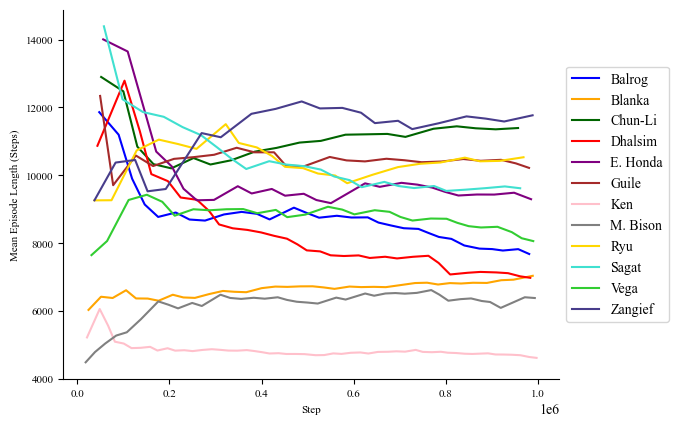

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(Balrog_ep_len.index, Balrog_ep_len['Value'],label='Balrog',color='blue')
ax1.plot(Blanka_ep_len.index, Blanka_ep_len['Value'],label='Blanka',color='orange')
ax1.plot(ChunLi_ep_len.index, ChunLi_ep_len['Value'],label='Chun-Li',color='darkgreen')
ax1.plot(Dhalsim_ep_len.index, Dhalsim_ep_len['Value'],label='Dhalsim',color='red')
ax1.plot(EHonda_ep_len.index, EHonda_ep_len['Value'],label='E. Honda',color='purple')
ax1.plot(Guile_ep_len.index, Guile_ep_len['Value'],label='Guile',color='brown')
ax1.plot(Ken_ep_len.index, Ken_ep_len['Value'],label='Ken',color='pink')
ax1.plot(MBison_ep_len.index, MBison_ep_len['Value'],label='M. Bison',color='gray')
ax1.plot(Ryu_ep_len.index, Ryu_ep_len['Value'],label='Ryu',color='gold')
ax1.plot(Sagat_ep_len.index, Sagat_ep_len['Value'],label='Sagat',color='turquoise')
ax1.plot(Vega_ep_len.index, Vega_ep_len['Value'],label='Vega',color='limegreen')
ax1.plot(Zangief_ep_len.index, Zangief_ep_len['Value'],label='Zangief',color='darkslateblue')
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Length (Steps)',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

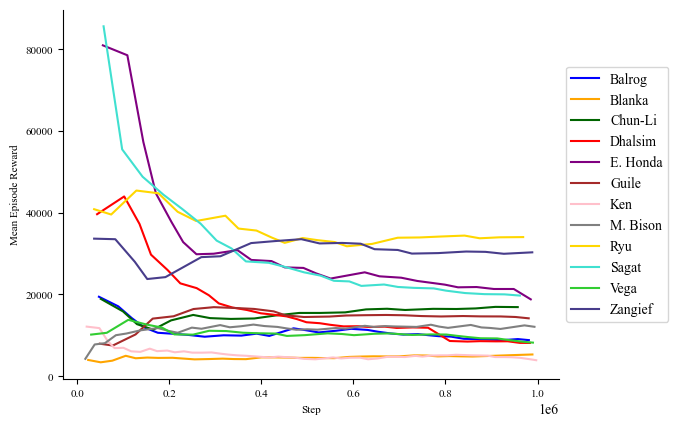

In [34]:
fig, ax1 = plt.subplots()
ax1.plot(Balrog_ep_rew.index, Balrog_ep_rew['Value'],label='Balrog',color='blue')
ax1.plot(Blanka_ep_rew.index, Blanka_ep_rew['Value'],label='Blanka',color='orange')
ax1.plot(ChunLi_ep_rew.index, ChunLi_ep_rew['Value'],label='Chun-Li',color='darkgreen')
ax1.plot(Dhalsim_ep_rew.index, Dhalsim_ep_rew['Value'],label='Dhalsim',color='red')
ax1.plot(EHonda_ep_rew.index, EHonda_ep_rew['Value'],label='E. Honda',color='purple')
ax1.plot(Guile_ep_rew.index, Guile_ep_rew['Value'],label='Guile',color='brown')
ax1.plot(Ken_ep_rew.index, Ken_ep_rew['Value'],label='Ken',color='pink')
ax1.plot(MBison_ep_rew.index, MBison_ep_rew['Value'],label='M. Bison',color='gray')
ax1.plot(Ryu_ep_rew.index, Ryu_ep_rew['Value'],label='Ryu',color='gold')
ax1.plot(Sagat_ep_rew.index, Sagat_ep_rew['Value'],label='Sagat',color='turquoise')
ax1.plot(Vega_ep_rew.index, Vega_ep_rew['Value'],label='Vega',color='limegreen')
ax1.plot(Zangief_ep_rew.index, Zangief_ep_rew['Value'],label='Zangief',color='darkslateblue')
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

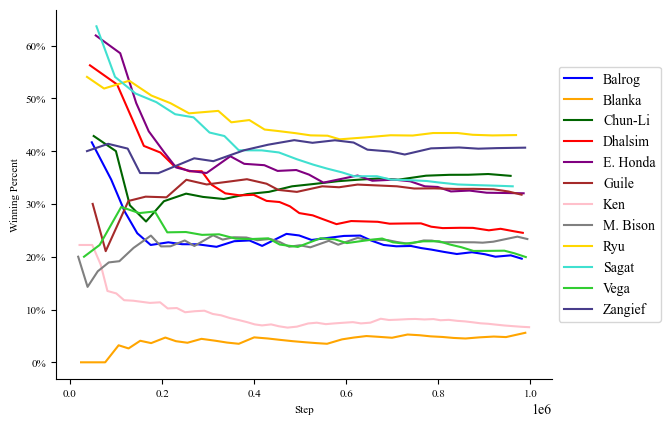

In [35]:
fig, ax1 = plt.subplots()
ax1.plot(Balrog_win_perc.index, Balrog_win_perc['Percent'],label='Balrog',color='blue')
ax1.plot(Blanka_win_perc.index, Blanka_win_perc['Percent'],label='Blanka',color='orange')
ax1.plot(ChunLi_win_perc.index, ChunLi_win_perc['Percent'],label='Chun-Li',color='darkgreen')
ax1.plot(Dhalsim_win_perc.index, Dhalsim_win_perc['Percent'],label='Dhalsim',color='red')
ax1.plot(EHonda_win_perc.index, EHonda_win_perc['Percent'],label='E. Honda',color='purple')
ax1.plot(Guile_win_perc.index, Guile_win_perc['Percent'],label='Guile',color='brown')
ax1.plot(Ken_win_perc.index, Ken_win_perc['Percent'],label='Ken',color='pink')
ax1.plot(MBison_win_perc.index, MBison_win_perc['Percent'],label='M. Bison',color='gray')
ax1.plot(Ryu_win_perc.index, Ryu_win_perc['Percent'],label='Ryu',color='gold')
ax1.plot(Sagat_win_perc.index, Sagat_win_perc['Percent'],label='Sagat',color='turquoise')
ax1.plot(Vega_win_perc.index, Vega_win_perc['Percent'],label='Vega',color='limegreen')
ax1.plot(Zangief_win_perc.index, Zangief_win_perc['Percent'],label='Zangief',color='darkslateblue')
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Winning Percent',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.rcParams["font.family"]="Times New Roman"
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

DQN Win Comp

In [36]:
Long_wins = pd.read_csv('./data/DQN/Long/DQN_Long_won.csv')
Long_losses = pd.read_csv('./data/DQN/Long/DQN_Long_lost.csv')
Long_wins = Long_wins.set_index('Step')
Long_losses = Long_losses.set_index('Step')
Long_wins = Long_wins.rename({'Value':'Wins'},axis=1)
Long_losses = Long_losses.rename({'Value':'Losses'},axis=1)
Long_wins = Long_wins.drop(['Wall time'], axis=1)
Long_losses = Long_losses.drop(['Wall time'], axis=1)

Long_win_perc = Long_wins.join(Long_losses)
Long_win_perc['Percent'] = Long_win_perc['Wins'] / (Long_win_perc['Wins'] + Long_win_perc['Losses'])

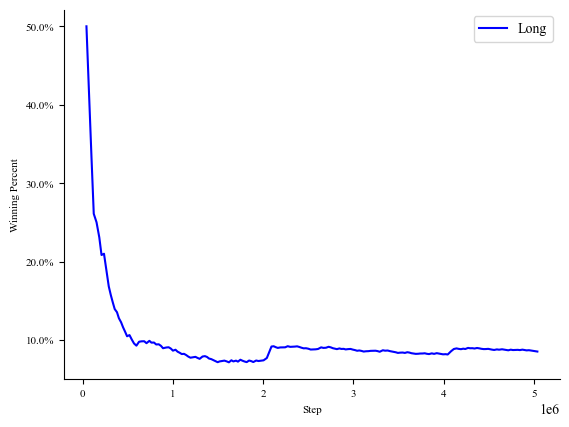

In [38]:
fig, ax1 = plt.subplots()
ax1.plot(Long_win_perc.index, Long_win_perc['Percent'],label='Long',color='blue')
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Winning Percent',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.rcParams["font.family"]="Times New Roman"
# plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.legend()
plt.show()